# Features e DataSet

> Este dataset foi obtido a partir da API do Yahoo Finance e contém dados históricos de preços de ações de bancos e instituições financeiras brasileiras listadas na B3 (Bolsa de Valores do Brasil).

> O intervalo temporal considerado vai de 1º de janeiro de 2019 até 31 de julho de 2025, abrangendo períodos de alta volatilidade como a pandemia de COVID-19 (2020), mudanças macroeconômicas, ciclos de juros e oscilações do mercado financeiro.

> Cada DataFrame representa um ticker específico, contendo informações diárias de mercado.

**Estrutura das Colunas**

- Open: preço de abertura da ação no pregão do dia.

- High: maior preço alcançado pela ação durante o pregão.

- Low: menor preço registrado durante o pregão.

- Close: preço de fechamento da ação no final do pregão.

- Adj Close: preço de fechamento ajustado, considerando proventos como dividendos, desdobramentos (splits) e grupamentos. É a coluna recomendada para análises históricas.

- Volume: número total de ações negociadas no dia.

- Date: data correspondente ao registro (índice do DataFrame).

**Tickers Selecionados**

- ITUB4.SA – Itaú Unibanco Holding S.A. (PN)

    - Um dos maiores bancos privados da América Latina.

    - Forte atuação em crédito, investimentos e serviços digitais.

- BBDC4.SA – Banco Bradesco S.A. (PN)

    - Outro gigante do setor bancário privado brasileiro.

    - Forte presença no varejo, seguros e serviços financeiros.

- BBAS3.SA – Banco do Brasil S.A. (ON)

    - Banco estatal com grande relevância histórica e presença no setor público e privado.

    - Atuação em crédito agrícola, varejo e corporate.

- SANB11.SA – Banco Santander (Brasil) S.A. (Units)

    - Subsidiária brasileira do grupo espanhol Santander.

    - Foco em expansão digital e crédito para pessoa física.

- BRSR6.SA – Banrisul – Banco do Estado do Rio Grande do Sul (PN)

  - Banco estatal regional com forte atuação no Rio Grande do Sul.

  - Oferece crédito pessoal, financiamento imobiliário, cartões e serviços corporativos.

  - Atua como banco de referência em programas estaduais e crédito para o setor agrícola.

- ABCB4.SA – Banco ABC Brasil S.A. (PN)

    - Banco de nicho focado em crédito corporativo.

    - Destaca-se pela atuação com empresas de médio e grande porte.

- BPAN4.SA – Banco Pan S.A. (PN)

  - Banco focado em crédito para pessoa física, principalmente consignado, financiamento de veículos e cartões de crédito.

  - Pertence ao grupo BTG Pactual + Caixa Econômica Federal, com forte digitalização nos últimos anos.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

tickers = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BRSR6.SA','ABCB4.SA','BPAN4.SA']
start_date = '2015-01-01'
end_date = '2025-08-11'

dfs = {}
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    df.rename(columns={'Close': 'Adj Close'}, inplace=True)
    df.reset_index(inplace=True)
    df['Ticker'] = ticker
    dfs[ticker] = df

/tmp/ipython-input-3460582901.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3460582901.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3460582901.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3460582901.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-346058290

In [ ]:
for ticker in tickers:
    df = dfs[ticker]
    index = df.columns.get_level_values(0)
    df.columns = index
    df = df.set_index('Date')
    dfs[ticker] = df

In [ ]:
for ticker in tickers:
    df = dfs[ticker]
    print(f'Ticker: {ticker}')
    print(df.columns)
    print(df.info())
    print()
    print(df.head())
    print(df.shape)
    print(df.isnull().sum())
    print()

Ticker: ITUB4.SA
Index(['Adj Close', 'High', 'Low', 'Open', 'Volume', 'Ticker'], dtype='object', name='Price')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2638 entries, 2015-01-02 to 2025-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2638 non-null   float64
 1   High       2638 non-null   float64
 2   Low        2638 non-null   float64
 3   Open       2638 non-null   float64
 4   Volume     2638 non-null   int64  
 5   Ticker     2638 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 144.3+ KB
None

Price       Adj Close       High        Low       Open    Volume    Ticker
Date                                                                      
2015-01-02  10.007595  10.297499   9.915891  10.131840  22832373  ITUB4.SA
2015-01-05  10.057892  10.161429   9.773904   9.850817  25885620  ITUB4.SA
2015-01-06  10.220586  10.220586   9.948430  10.057885  30498134  ITUB4.SA


# Estudo de Objeto

- Nenhuma coluna dos meus tickers apresentam valores vazios, não preciso me preocupar com imputação
- Segunda etapa será a visualização e identifcação de possíveis métricas nos meus dados.

## Outiliers e destribuições

**Log-returns**


$$
r_t = \log(P_t) - \log(P_{t-1})
$$

* Variação percentual do preço em escala logarítmica.

  * Tira a dependência da escala (ação a $R\$10$ e a $R\$100$ têm a mesma “taxa de retorno”).
  * Normaliza o crescimento exponencial de preços.
  * Deixa a série mais próxima de estacionária (o que LSTM/GRU gostam).

---

**Rolling z-score (30 e 60 dias)**

$$
z_t = \frac{r_t - \mu_{t-1}^{(w)}}{\sigma_{t-1}^{(w)}}
$$

onde $\mu^{(w)}$ e $\sigma^{(w)}$ são média e desvio padrão dos últimos $w$ dias (ex: 30 ou 60).

* Mede o quão “anormal” o retorno de hoje é comparado ao que vinha acontecendo na janela passada.
* Retornos tendem a oscilar em torno de uma média próxima de zero. Valores com |z| > 3 são improváveis → sinal de evento extraordinário.

---

**Spikes de volume (z-score do log(volume))**


$$
z^{(vol)}_t = \frac{\log(V_t) - \mu_{t-1}^{(vol)}}{\sigma_{t-1}^{(vol)}}
$$

* Mede desvios no volume negociado.
* Movimentos de preço com volume alto são mais relevantes (confirmação de tendência).

---

**Gaps**

$$
gap_t = \frac{Open_t - Close_{t-1}}{Close_{t-1}}
$$

* Diferença entre o fechamento de ontem e a abertura de hoje.
* Notícias fora do horário de pregão (balanços, crises) causam gaps. Não são previsíveis só pelos candles anteriores.
---

**Outlier como resultado**

* Pegar o máximo entre |z-score|, |mod\_z|, volume e gap.
* Cada métrica detecta um tipo de evento, o score final resume tudo.


In [ ]:
def process_ticker(df):
    # log-price e log-returns
    df['log_price'] = np.log(df['Adj Close'])
    df['log_return'] = df['log_price'].diff()

    # rolling z-score (30 e 60 dias)
    for w in [30,60]:
        gm = df['log_return'].shift(1).rolling(window=w, min_periods=10)
        df[f'mean_{w}'] = gm.mean()
        df[f'std_{w}'] = gm.std()
        df[f'z_{w}'] = (df['log_return'] - df[f'mean_{w}']) / df[f'std_{w}']
        df[f'z_{w}_abs'] = df[f'z_{w}'].abs()

    # volume z-score
    df['log_vol'] = np.log(df['Volume'].replace(0,np.nan))
    vol_mean = df['log_vol'].shift(1).rolling(30, min_periods=10).mean()
    vol_std = df['log_vol'].shift(1).rolling(30, min_periods=10).std()
    df['vol_z'] = (df['log_vol'] - vol_mean) / vol_std
    df['vol_z_abs'] = df['vol_z'].abs()

    # gap percentual (usar Series explícitas)
    df['prev_close'] = df['Adj Close'].shift(1)
    df['gap'] = (df['Open'] - df['prev_close']) / df['prev_close']

    # STL para visualizaçao geral
    stl = STL(df['Adj Close'], period=252)  # 1 ano ~ 252 pregões
    res = stl.fit()
    df['trend'] = res.trend
    df['seasonal'] = res.seasonal
    df['residual'] = res.resid

    return df

for ticker in tickers:
    dfs[ticker] = process_ticker(dfs[ticker])

In [ ]:
for ticker in tickers:
    df = dfs[ticker]
    print(f'Ticker: {ticker}')
    print(df.columns)
    print(df.isnull().sum())
    print()

Ticker: ITUB4.SA
Index(['Adj Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'log_price',
       'log_return', 'mean_30', 'std_30', 'z_30', 'z_30_abs', 'mean_60',
       'std_60', 'z_60', 'z_60_abs', 'log_vol', 'vol_z', 'vol_z_abs',
       'prev_close', 'gap', 'trend', 'seasonal', 'residual'],
      dtype='object', name='Price')
Price
Adj Close      0
High           0
Low            0
Open           0
Volume         0
Ticker         0
log_price      0
log_return     1
mean_30       11
std_30        11
z_30          11
z_30_abs      11
mean_60       11
std_60        11
z_60          11
z_60_abs      11
log_vol       11
vol_z         21
vol_z_abs     21
prev_close     1
gap            1
trend          0
seasonal       0
residual       0
dtype: int64

Ticker: BBDC4.SA
Index(['Adj Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'log_price',
       'log_return', 'mean_30', 'std_30', 'z_30', 'z_30_abs', 'mean_60',
       'std_60', 'z_60', 'z_60_abs', 'log_vol', 'vol_z', 'vol_z_abs',
  

In [ ]:
sns.set(style="whitegrid", context="talk", palette="tab10")

def plot_ticker(df, ticker):
    plt.figure(figsize=(13,9))

    plt.subplot(3,2,2)
    plt.plot(df.index, df['Adj Close'])
    plt.title(f'{ticker} - Adj Close')

    plt.subplot(3,2,3)
    plt.plot(df.index, df['log_return'])
    plt.title(f'{ticker} - Log-returns')
    plt.axhline(0, color='k', linestyle='--')

    plt.subplot(3,2,4)
    plt.plot(df.index, df['z_30'], label='z_30')
    plt.plot(df.index, df['z_60'], label='z_60')
    plt.axhline(3, color='r', linestyle='--')
    plt.axhline(-3, color='r', linestyle='--')
    plt.title(f'{ticker} - Rolling z-score log-returns')
    plt.legend()

    plt.subplot(3,2,5)
    plt.plot(df.index, df['vol_z'])
    plt.axhline(3, color='r', linestyle='--')
    plt.axhline(-3, color='r', linestyle='--')
    plt.title(f'{ticker} - Volume z-score')

    plt.subplot(3,2,6)
    plt.plot(df.index, df['gap'])
    plt.axhline(0, color='k', linestyle='--')
    plt.title(f'{ticker} - Gap percentual')

    plt.subplot(3,2,1)
    plt.plot(df.index, df['trend'], label='Trend')
    plt.plot(df.index, df['seasonal'], label='Seasonal')
    plt.plot(df.index, df['residual'], label='Residual')
    plt.title(f'{ticker} - STL decomposition')
    plt.legend()

    plt.tight_layout()
    plt.show()

### ITUB4.SA

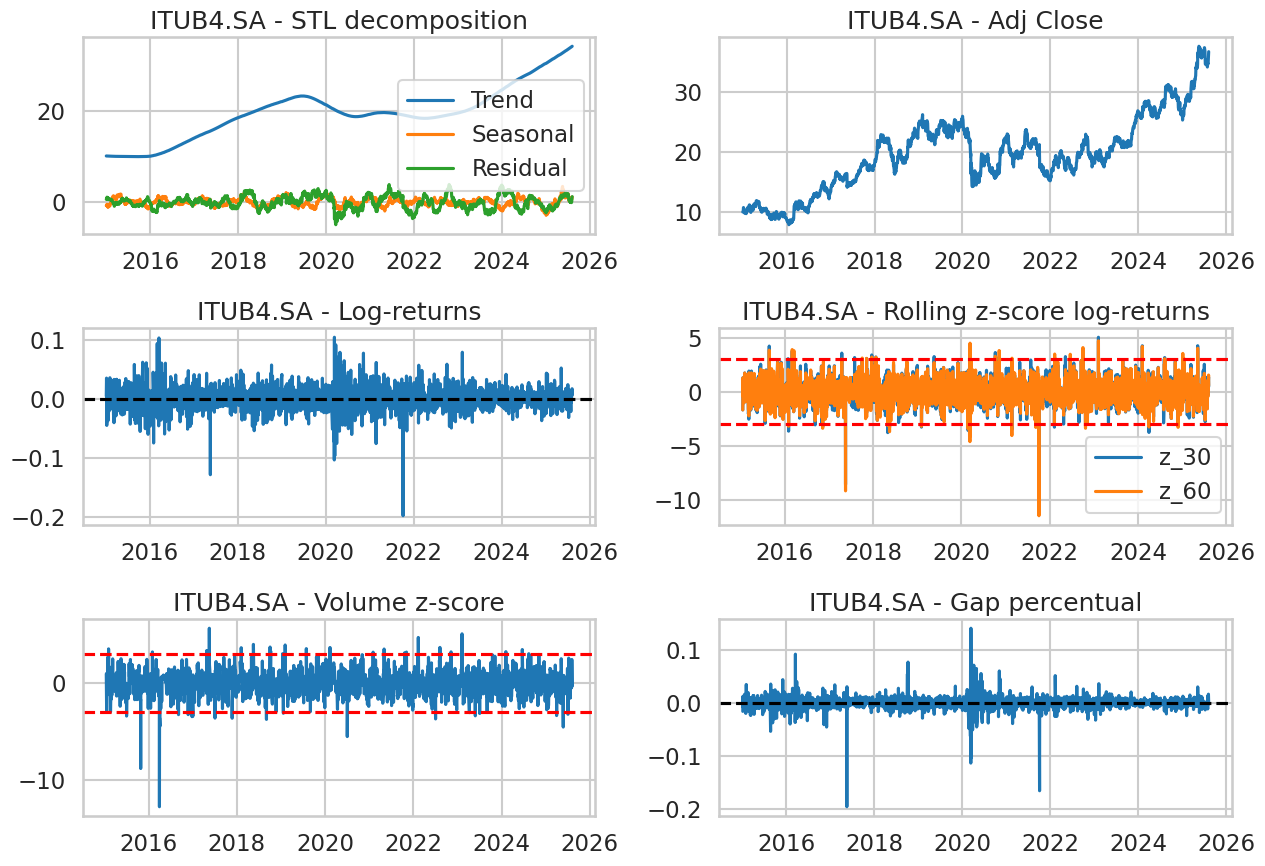

In [ ]:
plot_ticker(dfs[tickers[0]], tickers[0])

### BBDC4.SA

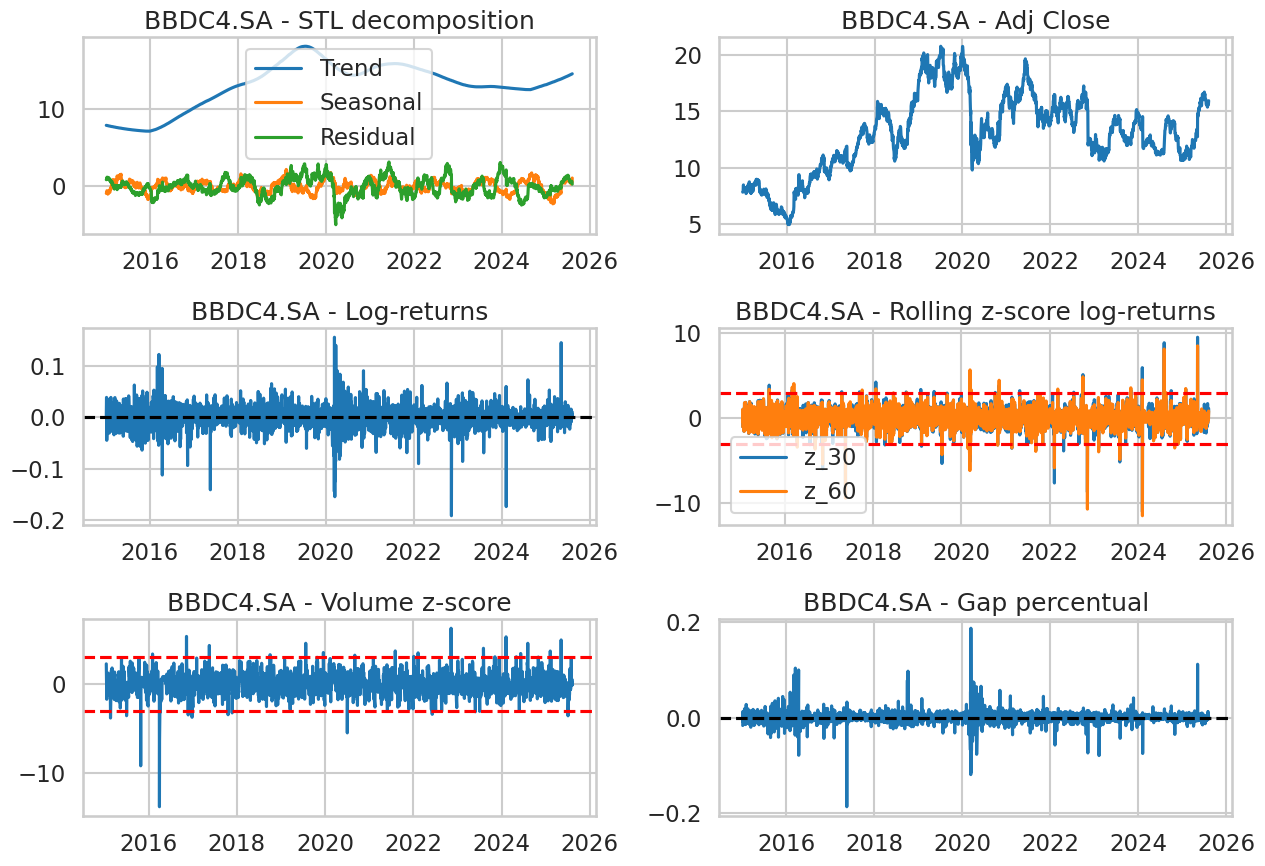

In [ ]:
plot_ticker(dfs[tickers[1]], tickers[1])

### BBAS3.SA

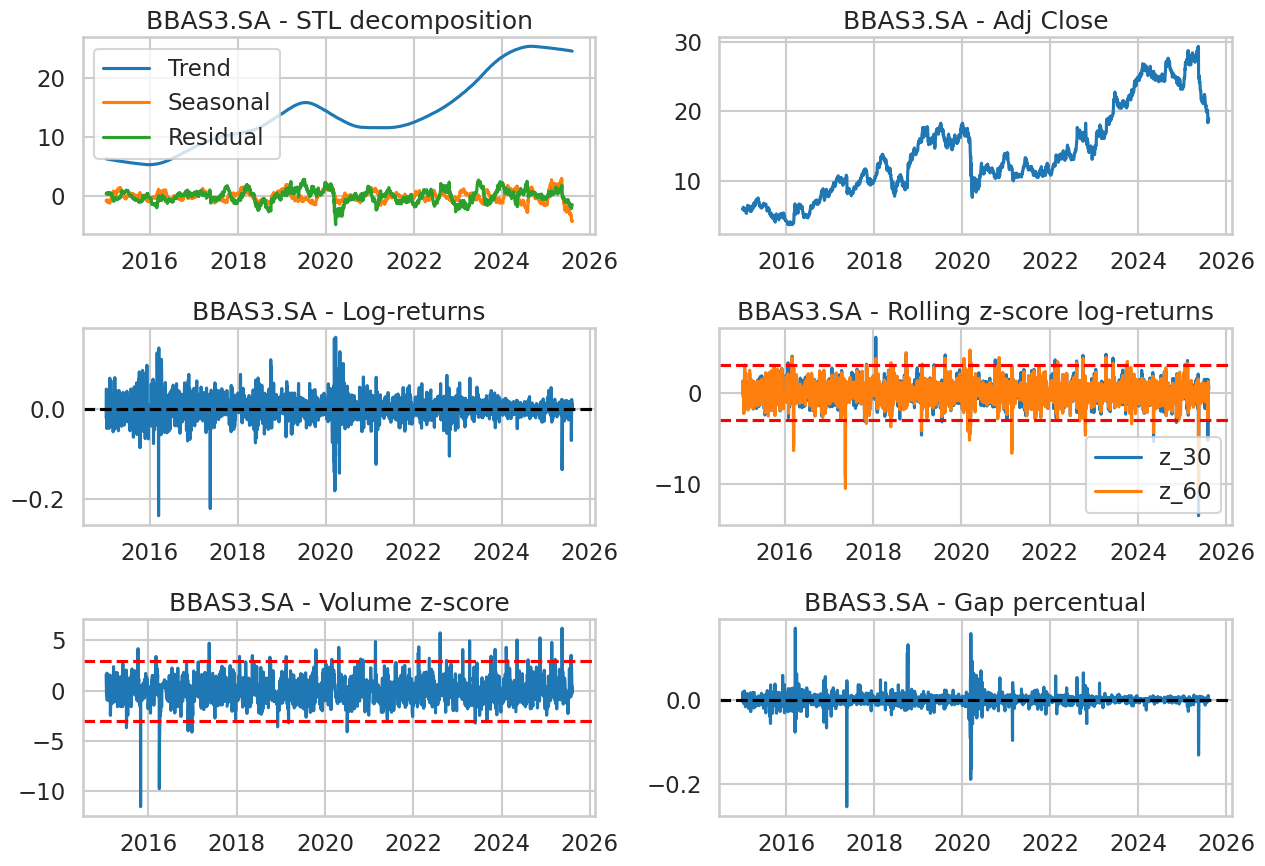

In [ ]:
plot_ticker(dfs[tickers[2]], tickers[2])

### SANB11.SA

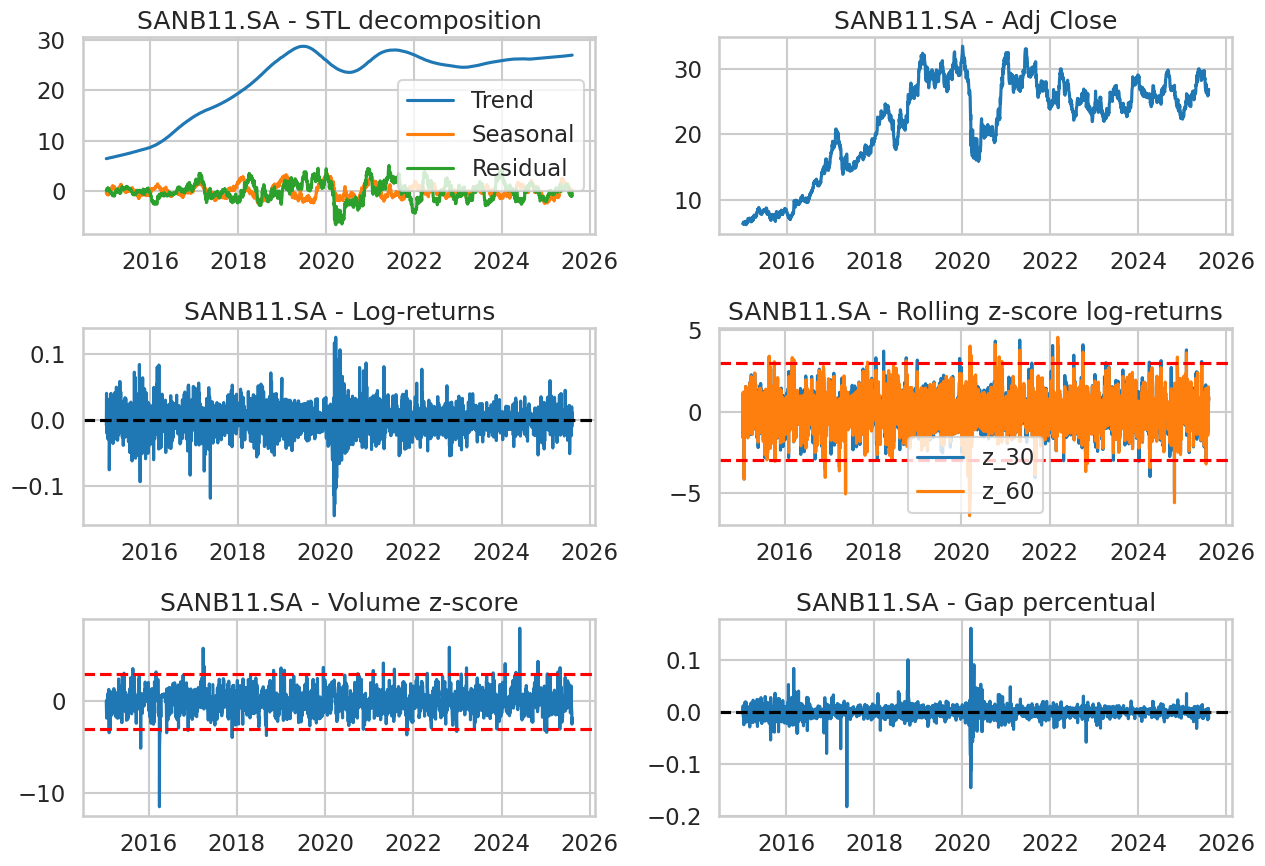

In [ ]:
plot_ticker(dfs[tickers[3]], tickers[3])

### BRSR6.SA

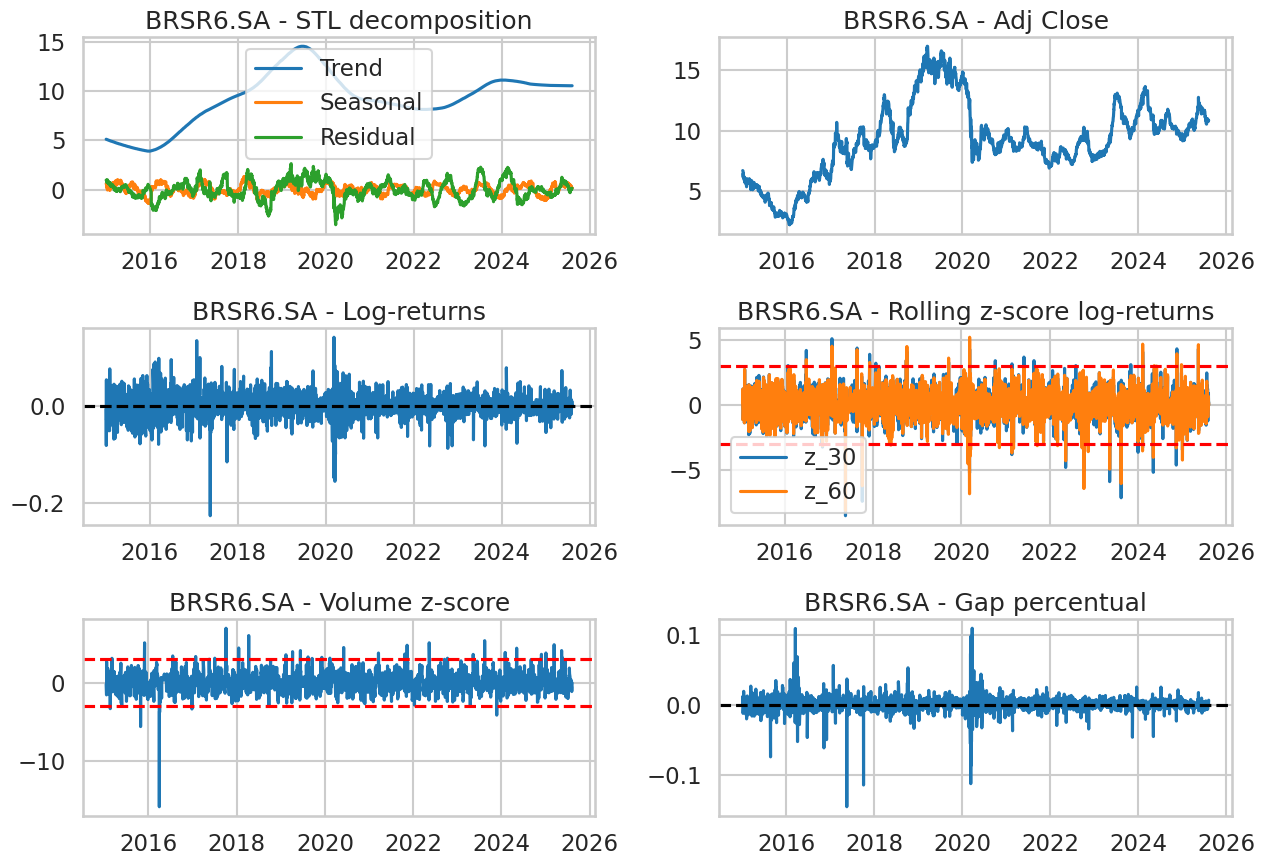

In [ ]:
plot_ticker(dfs[tickers[4]], tickers[4])

### ABCB4.SA

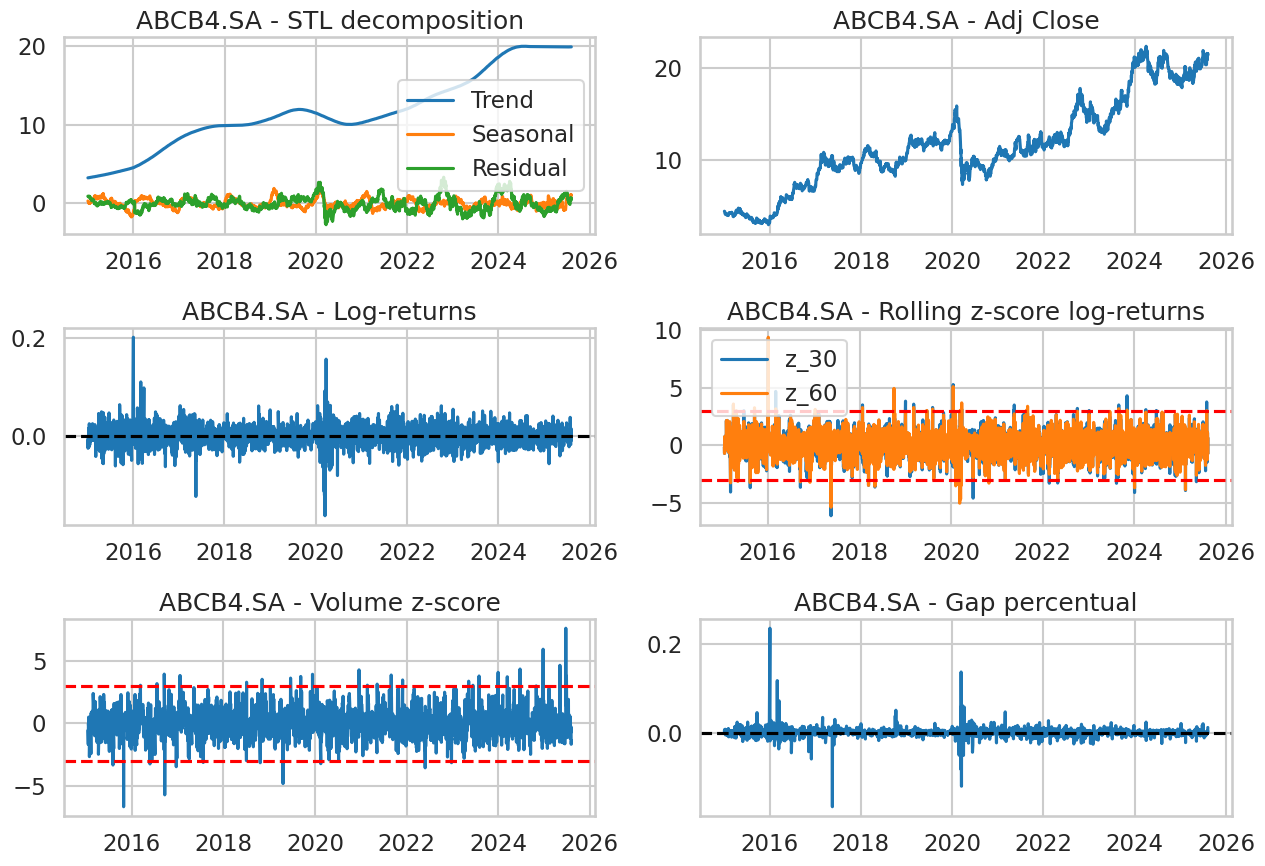

In [ ]:
plot_ticker(dfs[tickers[5]], tickers[5])

### BPAN4.SA

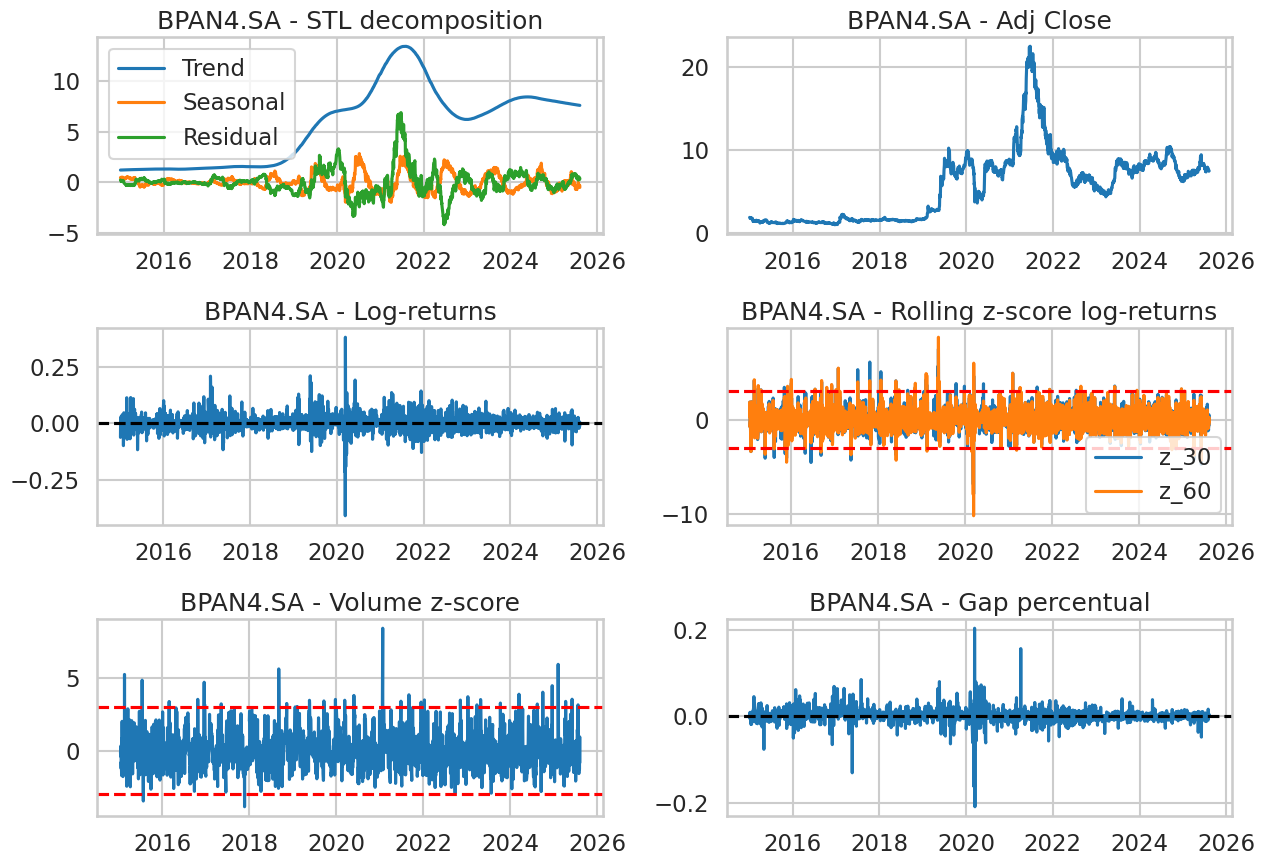

In [ ]:
plot_ticker(dfs[tickers[6]], tickers[6])

### Criando flags para Outliers

In [ ]:
for ticker in tickers:
  df = dfs[ticker]
  df['return_outlier_30'] = (df['z_30_abs'] > 3).astype(int)
  df['return_outlier_60'] = (df['z_60_abs'] > 3).astype(int)
  df['vol_outlier'] = (df['vol_z_abs'] > 3).astype(int)
  df['gap_outlier'] = (df['gap'].abs() > 0.05).astype(int)
  dfs[ticker] = df

## Novas featrues adicionais

Média Móvel Exponencial (EMA – Exponential Moving Average)

\begin{align}
{EMA}_t = \alpha \cdot P_t + (1 - \alpha) \cdot \text{EMA}_{t-1} \quad \text{onde } \alpha = \frac{2}{n+1}
\end{align}


---

Índice de Força Relativa (RSI – Relative Strength Index)

\begin{align}
{RSI} = 100 - \frac{100}{1 + RS} \quad \text{onde } RS = \frac{\text{Ganho médio}}{\text{Perda média}}
\end{align}

**Interpretação típica:**  
- RSI > 70 → sobrecomprado  
- RSI < 30 → sobrevendido

---

Bollinger Bands Width (BB Width)

* Bollinger Bands criam **uma faixa em torno da média móvel**, geralmente ±2 desvios-padrão.
* A **largura da banda** (BB Width) mede a volatilidade relativa:

$$
BB\ Width_t = \frac{\text{Upper Band}_t - \text{Lower Band}_t}{\text{Middle Band}_t}
$$



In [ ]:
for valor in (10, 30, 60):
  for ticker in tickers:
    df = dfs[ticker]
    df[f'SMA_{valor}'] = df['Adj Close'].rolling(window=valor).mean()
    df[f'EMA_{valor}'] = df['Adj Close'].ewm(span=valor, adjust=False).mean()

for ticker in tickers:
  df = dfs[ticker]
  df['std_30'] = df['Adj Close'].rolling(window=30).std()

  df['UB'] = df['SMA_30'] + 2*df['std_30']
  df['LB'] = df['SMA_30'] - 2*df['std_30']
  df['BB_width'] = (df['UB'] - df['LB']) / df['SMA_30']

  delta = df['Adj Close'].diff()
  gain = delta.clip(lower=0)
  loss = -delta.clip(upper=0)
  avg_gain = gain.rolling(window=14).mean()
  avg_loss = loss.rolling(window=14).mean()
  rs = avg_gain / avg_loss
  df[f'RSI_{14}'] = 100 - (100 / (1 + rs))

In [ ]:
colunas = ['std_30', 'std_30', 'EMA_10', 'EMA_30', 'EMA_60', 'SMA_60','BB_width', 'RSI_14', 'SMA_10', 'SMA_30']
for ticker in tickers:
  df = dfs[ticker]

  for col in colunas:
    df[col] = df[col].bfill()

In [ ]:
colunas = ['Adj Close', 'Volume', 'Ticker', 'log_price', 'std_30',
       'log_return', 'return_outlier_30', 'return_outlier_60', 'vol_outlier', 'gap_outlier',
       'EMA_10', 'EMA_30', 'SMA_10','EMA_60', 'SMA_60', 'SMA_30', 'BB_width', 'RSI_14']

dfs_finais = {}
for ticker in tickers:
  df = dfs[ticker]
  df = df[colunas]
  dfs_finais[ticker] = df

In [ ]:
dfs_finais[tickers[0]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2638 entries, 2015-01-02 to 2025-08-08
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Adj Close          2638 non-null   float64
 1   Volume             2638 non-null   int64  
 2   Ticker             2638 non-null   object 
 3   log_price          2638 non-null   float64
 4   std_30             2638 non-null   float64
 5   log_return         2637 non-null   float64
 6   return_outlier_30  2638 non-null   int64  
 7   return_outlier_60  2638 non-null   int64  
 8   vol_outlier        2638 non-null   int64  
 9   gap_outlier        2638 non-null   int64  
 10  EMA_10             2638 non-null   float64
 11  EMA_30             2638 non-null   float64
 12  SMA_10             2638 non-null   float64
 13  EMA_60             2638 non-null   float64
 14  SMA_60             2638 non-null   float64
 15  SMA_30             2638 non-null   float64
 16  BB_wid

### Embeddings e DF final

> Para entrada na minha rede, é importante sobreduto normalizar os dados, além disso, també, é importante vetorizar minha coluna ticker por se tratar de um modelo multiação.

In [ ]:
import torch
import torch.nn as nn

num_tickers = len(tickers)
embedding_dim = 3
ticker_to_idx = {ticker: i for i, ticker in enumerate(tickers)}

dfs_finais_idx = {}
for ticker in tickers:
    df = dfs_finais[ticker].copy()
    df['Ticker_idx'] = df['Ticker'].map(ticker_to_idx)
    dfs_finais_idx[ticker] = df

ticker_embedding = nn.Embedding(num_tickers, embedding_dim)

In [ ]:
df_final = pd.concat([dfs_finais_idx[ticker] for ticker in tickers], axis=0)
df_final = df_final.sort_index()

- Features auxiliares para testes

In [ ]:
df_final['diff_ema10'] = df['EMA_10'] - df['Adj Close']
df_final['diff_ema30'] = df['EMA_30'] - df['Adj Close']
df_final = df_final.dropna()

In [ ]:
df_final

Price,Adj Close,Volume,Ticker,log_price,std_30,log_return,return_outlier_30,return_outlier_60,vol_outlier,gap_outlier,...,EMA_30,SMA_10,EMA_60,SMA_60,SMA_30,BB_width,RSI_14,Ticker_idx,diff_ema10,diff_ema30
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.254570,1678969,SANB11.SA,1.833312,0.153687,-0.007101,0,0,0,0,...,6.296264,6.362527,6.297678,6.706153,6.463055,0.095117,58.188171,3,0.092490,0.105750
2015-01-05,6.620704,1178300,BRSR6.SA,1.890202,0.319466,-0.007017,0,0,0,0,...,6.664319,6.224860,6.665799,5.738153,5.896778,0.216706,33.333277,4,0.092490,0.105750
2015-01-05,1.744102,269700,BPAN4.SA,0.556240,0.165734,-0.062801,0,0,0,0,...,1.849853,1.769941,1.853439,1.504037,1.624213,0.408157,38.775527,6,0.092490,0.105750
2015-01-05,7.867377,19878785,BBDC4.SA,2.062725,0.178983,0.002061,0,0,0,0,...,7.852226,8.099145,7.851713,8.202515,8.084521,0.088556,58.437264,1,0.092490,0.105750
2015-01-05,4.449289,194403,ABCB4.SA,1.492744,0.119622,-0.008000,0,0,0,0,...,4.482721,4.265958,4.483855,4.174589,4.187455,0.114267,26.168201,5,0.092490,0.105750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-08,18.930000,38600300,BBAS3.SA,2.940748,1.216472,0.001057,0,0,0,0,...,20.265995,19.172000,21.685906,21.592987,20.467667,0.237735,36.119376,2,0.148978,0.272079
2025-08-08,10.840000,1039600,BRSR6.SA,2.383243,0.355305,0.000923,0,0,0,0,...,11.011944,10.844000,11.127064,11.420066,11.041667,0.128714,61.313885,4,0.148978,0.272079
2025-08-08,15.941888,25120200,BBDC4.SA,2.768950,0.403493,0.010709,0,0,0,0,...,15.765063,15.609802,15.435867,15.875472,15.943439,0.101231,59.133267,1,0.148978,0.272079


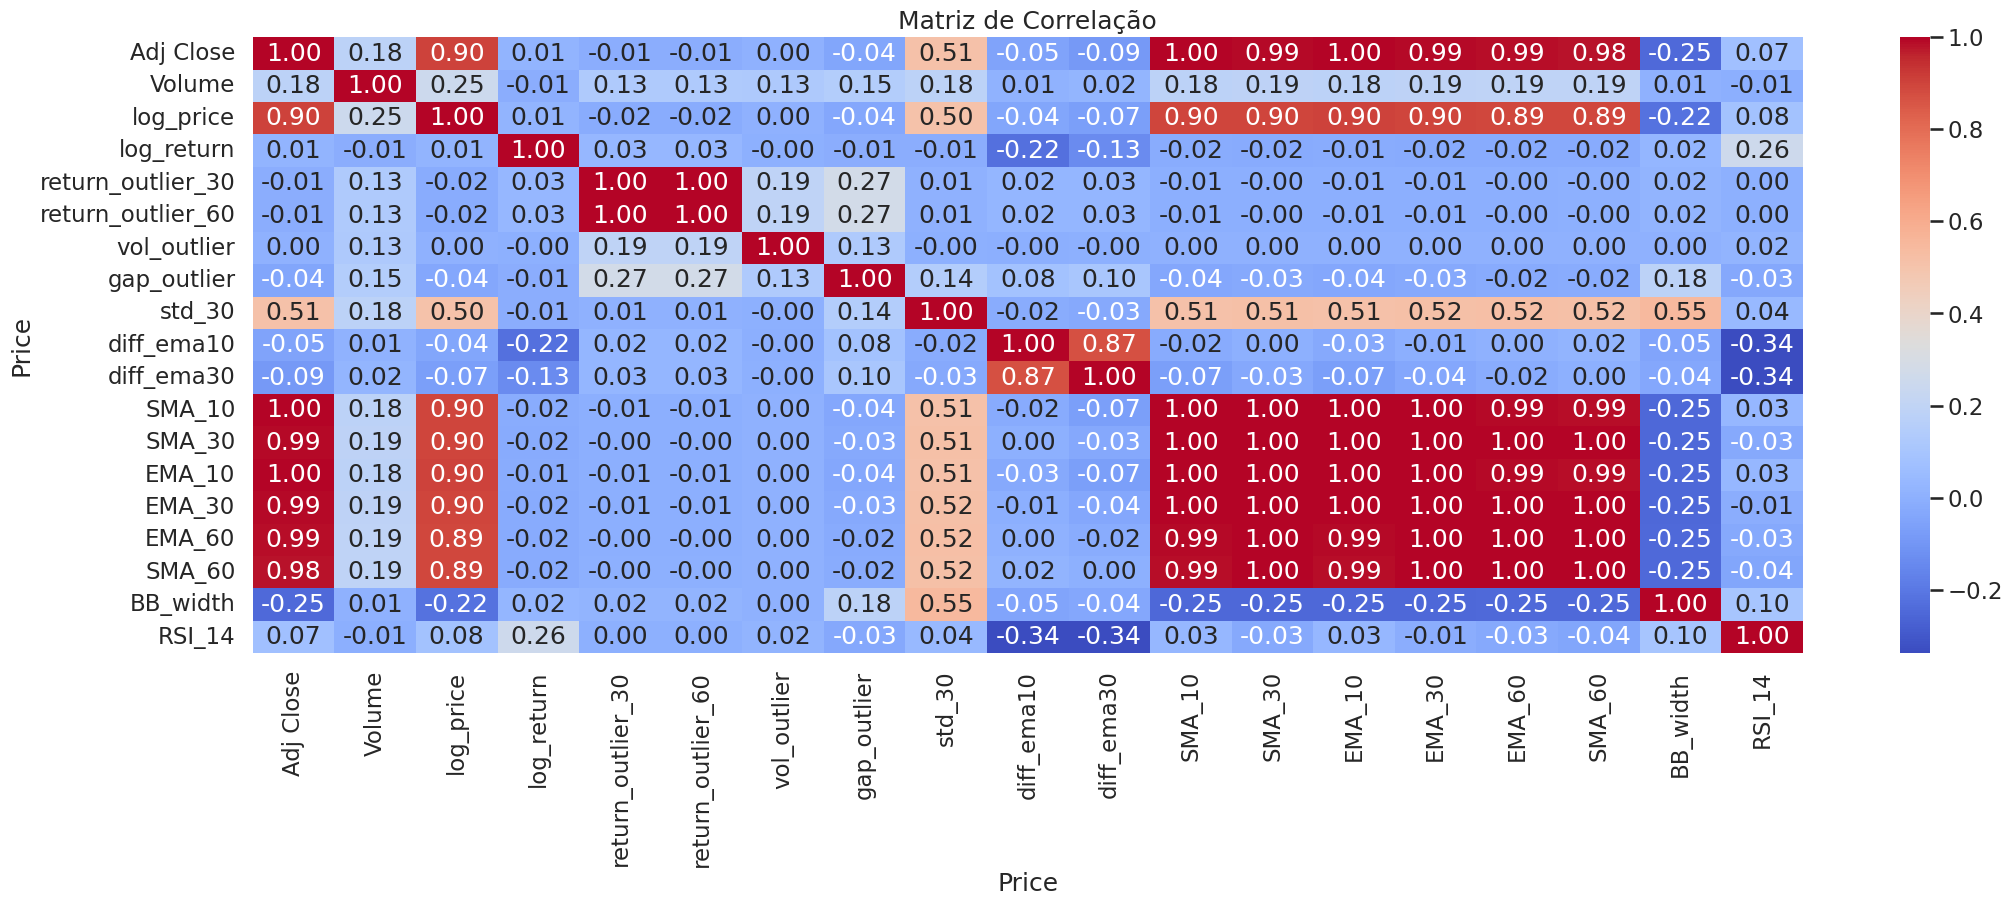

In [ ]:
corr = df_final[['Adj Close','Volume', 'log_price', 'log_return', 'return_outlier_30',
                'return_outlier_60', 'vol_outlier', 'gap_outlier', 'std_30',
                'diff_ema10', 'diff_ema30', 'SMA_10', 'SMA_30', 'EMA_10', 'EMA_30', 'EMA_60', 'SMA_60', 'BB_width', 'RSI_14']].corr()

plt.figure(figsize=(25,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Criação do Modelo

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

def criar_sequencia_rede(df, feature_cols, target_col, seq_len):
    X, y = [], []
    data = df[feature_cols].values
    target = df[target_col].values
    ticker_indices = df['Ticker_idx'].values

    for i in range(seq_len, len(df)):
        xi = data[i-seq_len:i]

        ticker_idx = ticker_indices[i-1]
        ticker_embed = ticker_embedding(torch.tensor(ticker_idx)).detach().numpy()
        ticker_embed_seq = np.tile(ticker_embed, (seq_len, 1))

        xi_full = np.concatenate([xi, ticker_embed_seq], axis=1)
        X.append(xi_full)
        y.append(target[i])

    return np.array(X), np.array(y)


feature_cols = ['std_30', 'Volume', 'log_price', 'return_outlier_30',
                'return_outlier_60', 'vol_outlier', 'gap_outlier',
                'BB_width', 'RSI_14', 'diff_ema10', 'diff_ema30']

target_col = 'Adj Close'
seq_len = 60

X, y = criar_sequencia_rede(df_final, feature_cols, target_col, seq_len)

Adj Close


In [ ]:
split = int(0.8 * len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_features = 11

X_train_num = X_train[:, :, :num_features].reshape(-1, num_features)
X_test_num  = X_test[:, :, :num_features].reshape(-1, num_features)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_num_scaled = scaler_x.fit_transform(X_train_num)
X_test_num_scaled  = scaler_x.transform(X_test_num)
y_train_num_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_num_scaled = scaler_y.transform(y_test.reshape(-1, 1))

y_train_scaled = y_train_num_scaled.reshape(-1)
y_test_scaled = y_test_num_scaled.reshape(-1)

X_train_scaled = np.concatenate([
    X_train_num_scaled.reshape(X_train.shape[0], X_train.shape[1], num_features),
    X_train[:, :, num_features:]
], axis=-1)

X_test_scaled = np.concatenate([
    X_test_num_scaled.reshape(X_test.shape[0], X_test.shape[1], num_features),
    X_test[:, :, num_features:]
], axis=-1)

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TimeSeriesDataset(X_train_scaled, y_train_scaled)
test_ds = TimeSeriesDataset(X_test_scaled, y_test_scaled)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

In [ ]:
class LSTM_GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_lstm=64, hidden_gru=32):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_lstm, num_layers = 2, batch_first=True, dropout=0.2) #dropout nas camadas de lstm
        self.dropout = nn.Dropout(0.3)
        self.gru = nn.GRU(input_size=hidden_lstm, hidden_size=hidden_gru, batch_first=True)
        self.fc = nn.Linear(hidden_gru, 1)

    def forward(self, x):
        out_lstm, _ = self.lstm(x)
        out_gru, _ = self.gru(out_lstm)
        out = self.fc(out_gru[:, -1, :])
        return out

input_size = X.shape[2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTM_GRU_Model(input_size=input_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-6) # regularizaçao l2 pra nao depender da media movel

# Treinamento e avaliação

In [ ]:
from copy import deepcopy
import torch

num_epochs = 40
patience = 10  # epocas pra parar
best_val_loss = float("inf")
counter = 0

train_losses, train_maes = [], []
val_losses, val_maes = [], []

print(f"Treinando modelo com: {X.shape[0]} dados, janela de {X.shape[1]} dias e {X.shape[2]} colunas (3 dimensões de embeddings)")

for epoch in range(num_epochs):
    model.train()
    train_loss, train_mae = 0.0, 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
        train_mae += torch.abs(outputs - y_batch).sum().item()

    train_loss /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)
    train_losses.append(train_loss)
    train_maes.append(train_mae)

    model.eval()
    val_loss, val_mae = 0.0, 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)

            val_loss += loss.item() * X_batch.size(0)
            val_mae += torch.abs(outputs - y_batch).sum().item()

    val_loss /= len(test_loader.dataset)
    val_mae /= len(test_loader.dataset)
    val_losses.append(val_loss)
    val_maes.append(val_mae)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Treino MSE: {train_loss:.6f} | Treino MAE: {train_mae:.6f} - "
          f"Val MSE: {val_loss:.6f} | Val MAE: {val_mae:.6f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping na epoch {epoch+1}, melhor Val Loss: {best_val_loss:.6f}")
            break

model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "lstm_gru_multiacao.pth")
print("Modelo salvo com Early Stopping")

Treinando modelo com: 18399 dados, janela de 60 dias e 14 colunas (3 dimensões de embeddings)
Epoch [1/40] - Treino MSE: 0.037934 | Treino MAE: 0.151896 - Val MSE: 0.059910 | Val MAE: 0.218041
Epoch [2/40] - Treino MSE: 0.030603 | Treino MAE: 0.136172 - Val MSE: 0.055930 | Val MAE: 0.212609
Epoch [3/40] - Treino MSE: 0.029683 | Treino MAE: 0.134221 - Val MSE: 0.055415 | Val MAE: 0.209438
Epoch [4/40] - Treino MSE: 0.028816 | Treino MAE: 0.132491 - Val MSE: 0.054329 | Val MAE: 0.205337
Epoch [5/40] - Treino MSE: 0.028335 | Treino MAE: 0.131388 - Val MSE: 0.055914 | Val MAE: 0.206169
Epoch [6/40] - Treino MSE: 0.027574 | Treino MAE: 0.129842 - Val MSE: 0.053749 | Val MAE: 0.203190
Epoch [7/40] - Treino MSE: 0.027481 | Treino MAE: 0.129719 - Val MSE: 0.051655 | Val MAE: 0.201144
Epoch [8/40] - Treino MSE: 0.027280 | Treino MAE: 0.129264 - Val MSE: 0.054127 | Val MAE: 0.203270
Epoch [9/40] - Treino MSE: 0.027249 | Treino MAE: 0.129059 - Val MSE: 0.052120 | Val MAE: 0.200978
Epoch [10/40] -

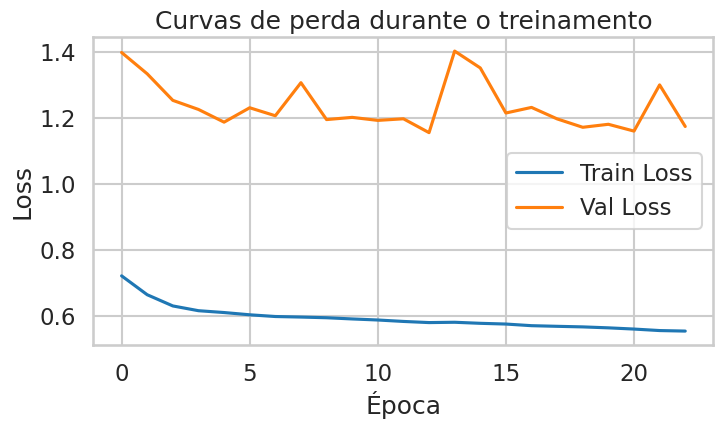

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Curvas de perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

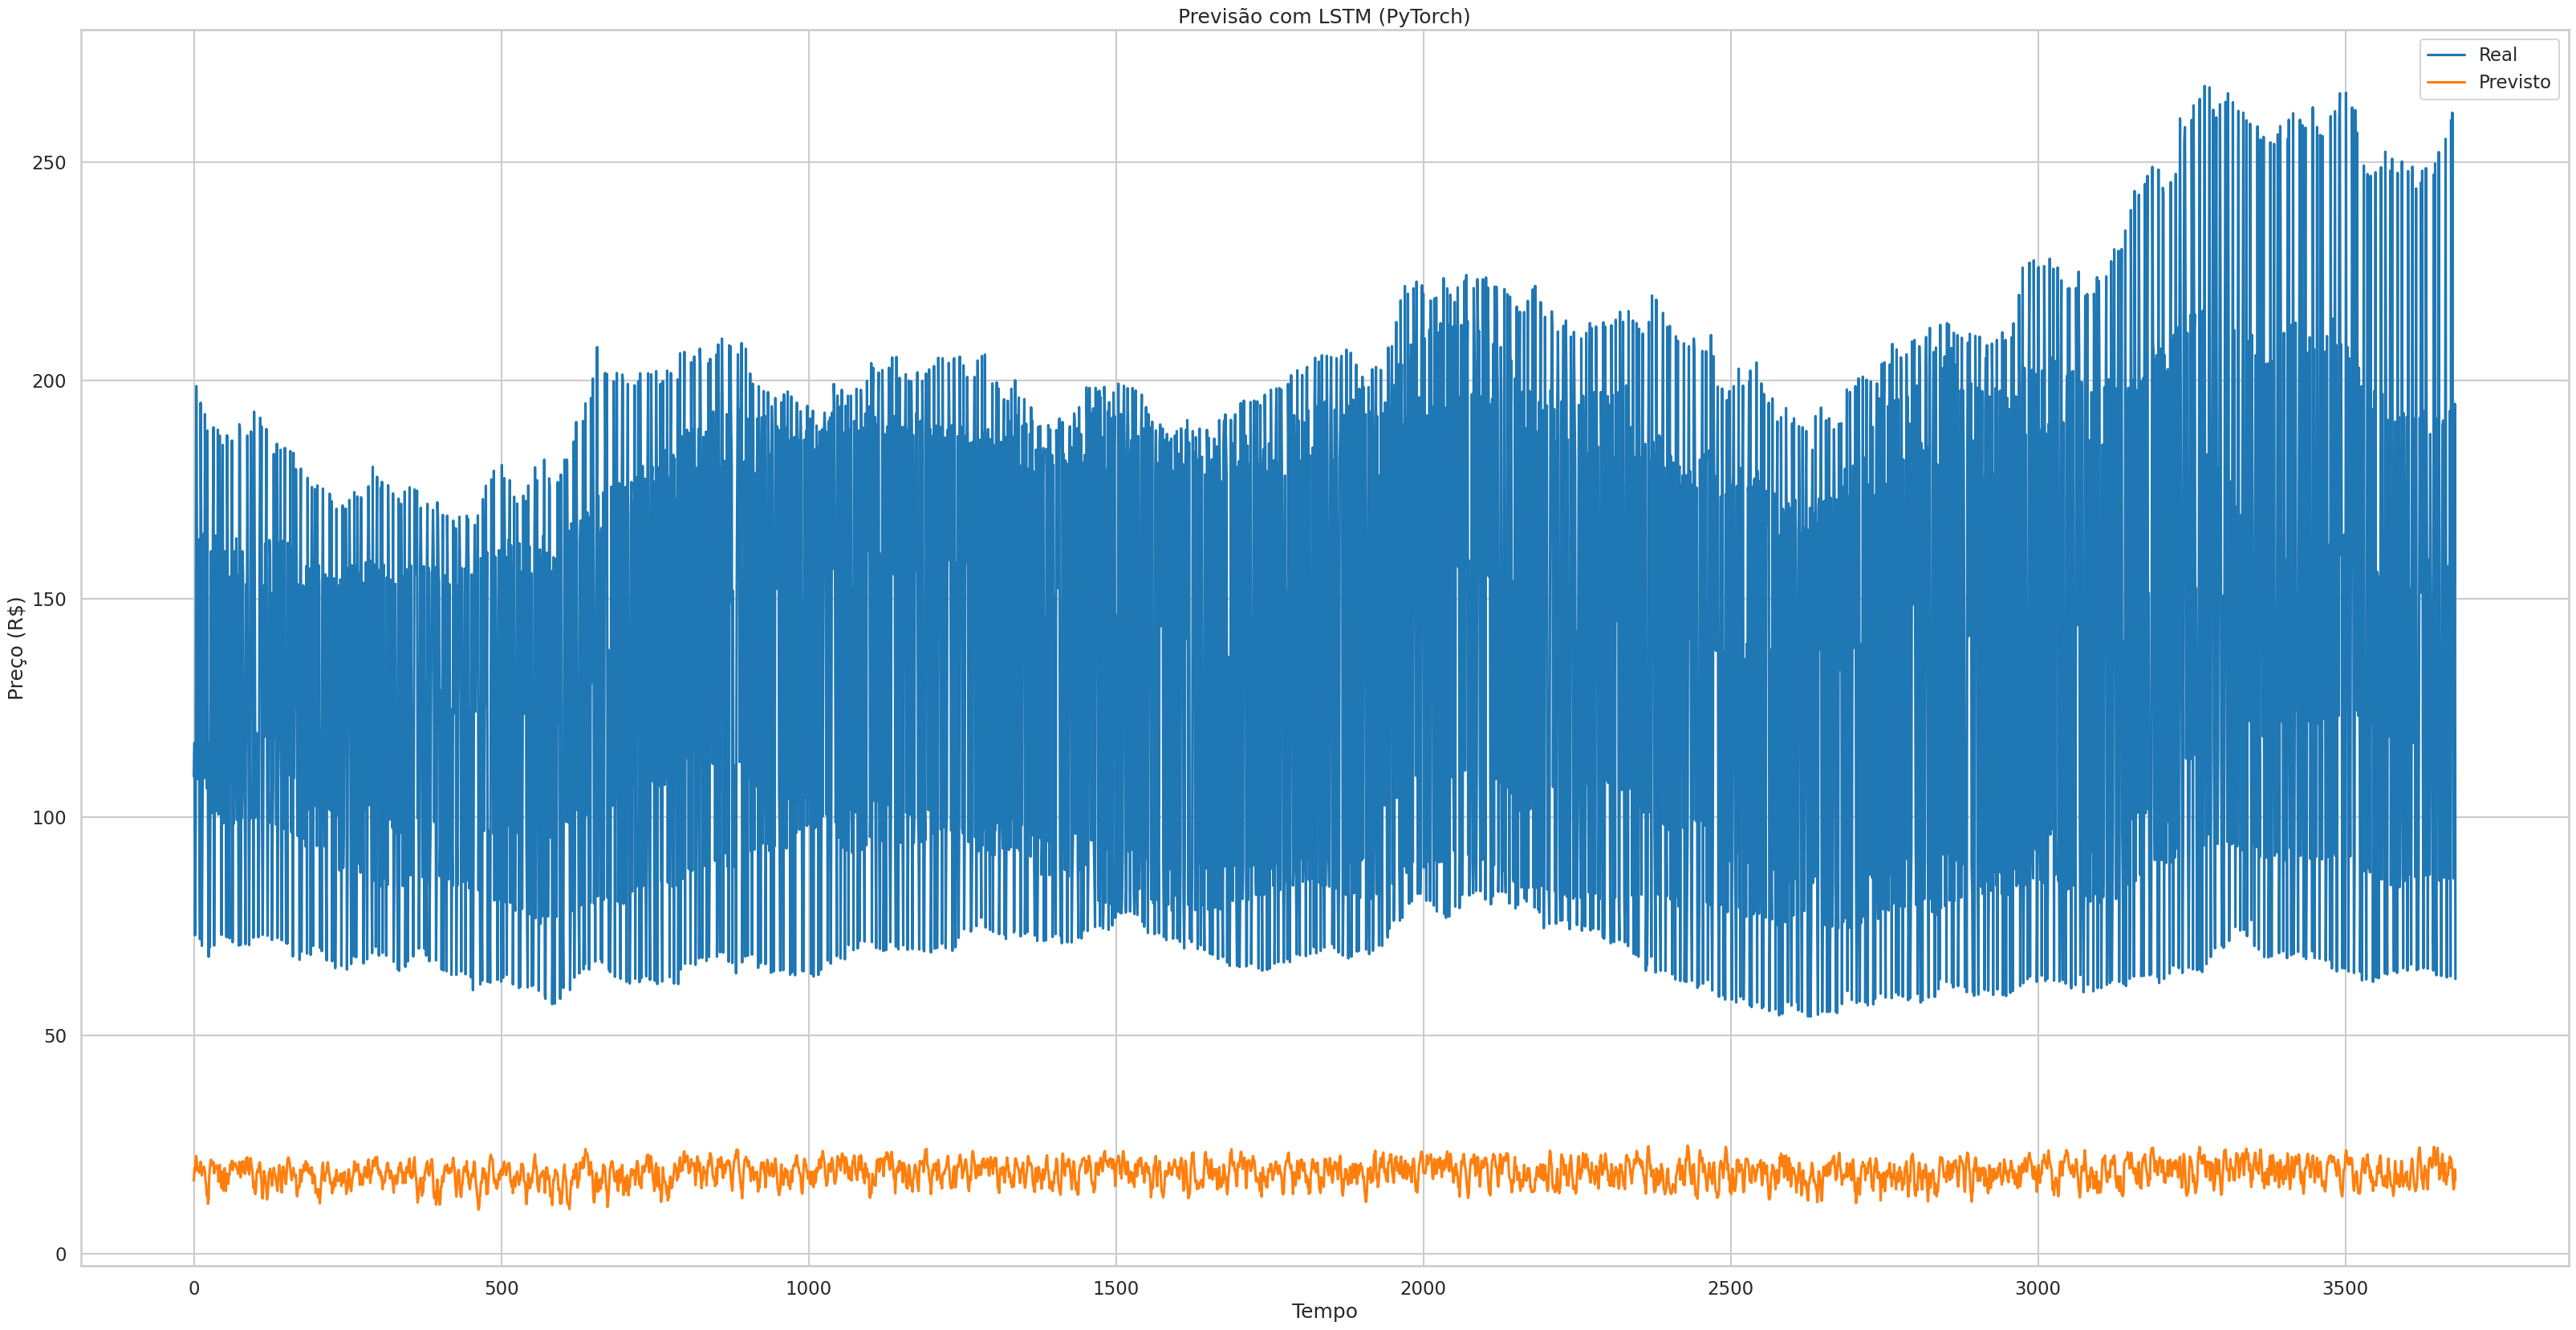

In [ ]:
model.eval()
preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        out = model(xb)
        preds.extend(out.cpu().numpy())

preds = np.array(preds)
preds_full = np.zeros((len(preds), scaler_y.n_features_in_))
actual_full = np.zeros((len(y[split:]), scaler_y.n_features_in_))
preds_full[:, 0] = preds[:, 0]
actual_full[:, 0] = y[split:]

preds_inverse = scaler_y.inverse_transform(preds_full)[:, 0]
actual_inverse = scaler_y.inverse_transform(actual_full)[:, 0]

plt.figure(figsize=(40,20))
plt.plot(actual_inverse, label='Real')
plt.plot(preds_inverse, label='Previsto')
plt.legend()
plt.title('Previsão com LSTM (PyTorch)')
plt.xlabel('Tempo')
plt.ylabel('Preço (R$)')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


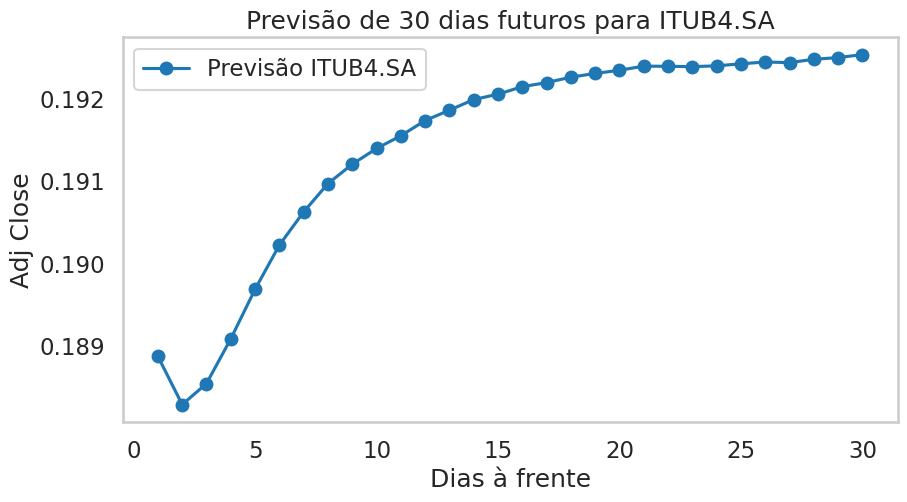

Dia +1: R$ 0.1889
Dia +2: R$ 0.1883
Dia +3: R$ 0.1885
Dia +4: R$ 0.1891
Dia +5: R$ 0.1897
Dia +6: R$ 0.1902
Dia +7: R$ 0.1906
Dia +8: R$ 0.1910
Dia +9: R$ 0.1912
Dia +10: R$ 0.1914
Dia +11: R$ 0.1915
Dia +12: R$ 0.1917
Dia +13: R$ 0.1919
Dia +14: R$ 0.1920
Dia +15: R$ 0.1921
Dia +16: R$ 0.1921
Dia +17: R$ 0.1922
Dia +18: R$ 0.1923
Dia +19: R$ 0.1923
Dia +20: R$ 0.1923
Dia +21: R$ 0.1924
Dia +22: R$ 0.1924
Dia +23: R$ 0.1924
Dia +24: R$ 0.1924
Dia +25: R$ 0.1924
Dia +26: R$ 0.1924
Dia +27: R$ 0.1924
Dia +28: R$ 0.1925
Dia +29: R$ 0.1925
Dia +30: R$ 0.1925


In [ ]:
def prever_futuro_ticker(df_final, ticker, feature_cols, seq_len, n_future=7):
    df_ticker = df_final[df_final["Ticker"] == ticker].copy()
    df_ticker_scaled = df_ticker.copy()
    df_ticker_scaled[feature_cols] = scaler_x.transform(df_ticker[feature_cols])
    last_data = df_ticker_scaled[feature_cols + ["Ticker_idx"]].values[-seq_len:]

    ticker_idx = int(last_data[-1, -1])
    ticker_embed = ticker_embedding(torch.tensor(ticker_idx)).detach().numpy()
    ticker_embed_seq = np.tile(ticker_embed, (seq_len, 1))

    current_input = np.concatenate([last_data[:, :-1], ticker_embed_seq], axis=1)
    current_input = torch.tensor(current_input, dtype=torch.float32).unsqueeze(0).to(device)

    future_preds = []

    model.eval()
    with torch.no_grad():
        for _ in range(n_future):
            next_pred = model(current_input)
            pred_val = next_pred.cpu().numpy()[0, 0]
            future_preds.append(pred_val)

            last_features = current_input[0, -1, :].cpu().numpy()[:-ticker_embed.shape[0]]
            next_step = np.concatenate([last_features, ticker_embed])
            next_step = next_step.reshape(1, 1, -1)

            current_input = torch.cat([current_input[:, 1:, :], torch.tensor(next_step, dtype=torch.float32).to(device)], dim=1)

    plt.figure(figsize=(10,5))
    plt.plot(range(1, n_future+1), future_preds, marker='o', label=f'Previsão {ticker}')
    plt.title(f'Previsão de {n_future} dias futuros para {ticker}')
    plt.xlabel('Dias à frente')
    plt.ylabel('Adj Close')
    plt.grid()
    plt.legend()
    plt.show()

    for i, p in enumerate(future_preds):
        print(f"Dia +{i+1}: R$ {p:.4f}")

    return future_preds

previsoes_itub = prever_futuro_ticker(df_final, "ITUB4.SA", feature_cols, seq_len, n_future=30)


In [ ]:
ticker = 'ITUB4.SA'
start_date = '2025-08-08'
end_date = '2025-09-08'


df_teste = yf.download(ticker, start=start_date, end=end_date)
df_teste.rename(columns={'Close': 'Adj Close'}, inplace=True)
df_teste.reset_index(inplace=True)
df_teste['Ticker'] = ticker
df_teste

/tmp/ipython-input-3189070331.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_teste = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,High,Low,Open,Volume,Ticker
Ticker,,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,
0,2025-08-08,36.656811,36.775604,36.379634,36.419232,17795400,ITUB4.SA
1,2025-08-11,36.884487,36.993379,36.369731,36.439025,22034200,ITUB4.SA
2,2025-08-12,37.646732,37.884315,37.013183,37.082477,27002700,ITUB4.SA
3,2025-08-13,37.290359,37.735825,37.270564,37.537840,21959700,ITUB4.SA
4,2025-08-14,37.240860,37.617031,36.904286,36.973581,26037600,ITUB4.SA
5,2025-08-15,37.112175,37.448749,36.973583,37.112175,18959200,ITUB4.SA
6,2025-08-18,37.379452,37.676431,37.131971,37.221064,21027800,ITUB4.SA
7,2025-08-19,36.293350,36.903067,35.873541,36.893074,39629100,ITUB4.SA
8,2025-08-20,36.313343,36.513248,36.033469,36.253369,16402800,ITUB4.SA
